In [1]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
coursera_r_orig = pd.read_csv('Coursera_reviews.csv')

In [3]:
coursera_r_orig.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [4]:
coursera_r_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


El archivo tiene una gran cantidad de duplicados, que se dropean

In [5]:
coursera_r_orig.reviews.duplicated().sum()

996433

In [6]:
coursera_r_orig = coursera_r_orig.drop_duplicates()

In [7]:
coursera_r_orig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519947 entries, 0 to 1454644
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   reviews       519891 non-null  object
 1   reviewers     519947 non-null  object
 2   date_reviews  519947 non-null  object
 3   rating        519947 non-null  int64 
 4   course_id     519947 non-null  object
dtypes: int64(1), object(4)
memory usage: 23.8+ MB


Reemplazo las comas por espacios para que no lo tome como decimal

In [8]:
coursera_r_orig['date_reviews'] = coursera_r_orig['date_reviews'].str.replace(',','')

Se lo pasa a formato de fecha

In [9]:
coursera_r_orig['date_reviews'] = pd.to_datetime(coursera_r_orig['date_reviews'])

Se crea una columna con los años de las fechas para facilitar el análisis

In [10]:
coursera_r_orig['year'] = pd.DatetimeIndex(coursera_r_orig['date_reviews']).year

In [11]:
coursera_r_orig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519947 entries, 0 to 1454644
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   reviews       519891 non-null  object        
 1   reviewers     519947 non-null  object        
 2   date_reviews  519947 non-null  datetime64[ns]
 3   rating        519947 non-null  int64         
 4   course_id     519947 non-null  object        
 5   year          519947 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 27.8+ MB


In [12]:
coursera_r_orig.head(3)

,reviews,reviewers,date_reviews,rating,course_id,year
0,"Pretty dry, but I was able to pass with just t...",By Robert S,2020-02-12,4,google-cbrs-cpi-training,2020
1,would be a better experience if the video and ...,By Gabriel E R,2020-09-28,4,google-cbrs-cpi-training,2020
2,Information was perfect! The program itself wa...,By Jacob D,2020-04-08,4,google-cbrs-cpi-training,2020


Se pasa toda la columna a minúscula

In [13]:
coursera_r_orig['reviews'] = coursera_r_orig['reviews'].astype(str).str.lower()

In [14]:
coursera_r_orig['reviews'].head(3)

0    pretty dry, but i was able to pass with just t...
1    would be a better experience if the video and ...
2    information was perfect! the program itself wa...
Name: reviews, dtype: object

Se generan tokens con las palabras para poder hacer un análisis de sentimiento a partir de las reviews

In [15]:
regexp = RegexpTokenizer('\w+')

In [16]:
coursera_r_orig['reviews_token']=coursera_r_orig['reviews'].apply(regexp.tokenize)
coursera_r_orig.head(3)

,reviews,reviewers,date_reviews,rating,course_id,year,reviews_token
0,"pretty dry, but i was able to pass with just t...",By Robert S,2020-02-12,4,google-cbrs-cpi-training,2020,"[pretty, dry, but, i, was, able, to, pass, wit..."
1,would be a better experience if the video and ...,By Gabriel E R,2020-09-28,4,google-cbrs-cpi-training,2020,"[would, be, a, better, experience, if, the, vi..."
2,information was perfect! the program itself wa...,By Jacob D,2020-04-08,4,google-cbrs-cpi-training,2020,"[information, was, perfect, the, program, itse..."


In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/monica/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stopwords = nltk.corpus.stopwords.words("english")

Se eligen palabras que no aportan nada al análisis y se repiten mucho

In [19]:
my_stopwords = ['https', 'course', 'curso', 'really', 'que', 'would']
stopwords.extend(my_stopwords)

Se vuelven a generar los tokens, evitando las palabras excluidas

In [20]:
coursera_r_orig['reviews_token'] = coursera_r_orig['reviews_token'].apply(lambda x: [item for item in x if item not in stopwords])
coursera_r_orig.head(3)

,reviews,reviewers,date_reviews,rating,course_id,year,reviews_token
0,"pretty dry, but i was able to pass with just t...",By Robert S,2020-02-12,4,google-cbrs-cpi-training,2020,"[pretty, dry, able, pass, two, complete, watch..."
1,would be a better experience if the video and ...,By Gabriel E R,2020-09-28,4,google-cbrs-cpi-training,2020,"[better, experience, video, screen, shots, sho..."
2,information was perfect! the program itself wa...,By Jacob D,2020-04-08,4,google-cbrs-cpi-training,2020,"[information, perfect, program, little, annoyi..."


In [21]:
coursera_r_orig['reviews_string'] = coursera_r_orig['reviews_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [22]:
coursera_r_orig[['reviews', 'reviews_token', 'reviews_string']].head()

,reviews,reviews_token,reviews_string
0,"pretty dry, but i was able to pass with just t...","[pretty, dry, able, pass, two, complete, watch...",pretty dry able pass two complete watches happ...
1,would be a better experience if the video and ...,"[better, experience, video, screen, shots, sho...",better experience video screen shots sho side ...
2,information was perfect! the program itself wa...,"[information, perfect, program, little, annoyi...",information perfect program little annoying wa...
3,a few grammatical mistakes on test made me do ...,"[grammatical, mistakes, test, made, double, ta...",grammatical mistakes test made double take bad
4,excellent course and the training provided was...,"[excellent, training, provided, detailed, easy...",excellent training provided detailed easy follow


In [23]:
all_words = ' '.join([word for word in coursera_r_orig['reviews_string']])

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/monica/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [26]:
fdist = FreqDist(tokenized_words)
fdist

FreqDist({'great': 94091, 'good': 93779, 'learning': 57193, 'well': 44842, 'thank': 44385, 'lot': 42486, 'excellent': 42483, 'learn': 41624, 'much': 34230, 'understand': 31416, ...})

In [27]:
coursera_r_orig['reviews_string_fdist'] = coursera_r_orig['reviews_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 4 ]))

In [28]:
coursera_r_orig[['reviews', 'reviews_token', 'reviews_string', 'reviews_string_fdist']].head()

,reviews,reviews_token,reviews_string,reviews_string_fdist
0,"pretty dry, but i was able to pass with just t...","[pretty, dry, able, pass, two, complete, watch...",pretty dry able pass two complete watches happ...,pretty dry able pass two complete watches happ...
1,would be a better experience if the video and ...,"[better, experience, video, screen, shots, sho...",better experience video screen shots sho side ...,better experience video screen shots sho side ...
2,information was perfect! the program itself wa...,"[information, perfect, program, little, annoyi...",information perfect program little annoying wa...,information perfect program little annoying wa...
3,a few grammatical mistakes on test made me do ...,"[grammatical, mistakes, test, made, double, ta...",grammatical mistakes test made double take bad,grammatical mistakes test made double take bad
4,excellent course and the training provided was...,"[excellent, training, provided, detailed, easy...",excellent training provided detailed easy follow,excellent training provided detailed easy follow


In [29]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/monica/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/monica/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [30]:
wordnet_lem = WordNetLemmatizer()

In [31]:
coursera_r_orig['reviews_string_lem'] = coursera_r_orig['reviews_string_fdist'].apply(wordnet_lem.lemmatize)

In [32]:
coursera_r_orig['is_equal']= (coursera_r_orig['reviews_string_fdist']==coursera_r_orig['reviews_string_lem'])

In [33]:
coursera_r_orig.is_equal.value_counts()

True     519734
False       213
Name: is_equal, dtype: int64

In [34]:
all_words_lem = ' '.join([word for word in coursera_r_orig['reviews_string_lem']])

In [35]:
words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [36]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/monica/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [37]:
analyzer = SentimentIntensityAnalyzer()

Se empieza a separar las reviews positivas de las negativas

In [38]:
coursera_r_orig['polarity'] = coursera_r_orig['reviews_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
coursera_r_orig.tail(3)

,reviews,reviewers,date_reviews,rating,course_id,year,reviews_token,reviews_string,reviews_string_fdist,reviews_string_lem,is_equal,polarity
1454642,nice,By Aung T K,2020-10-10,5,computer-networking,2020,[nice],nice,nice,nice,True,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
1454643,good,By Anthony N S,2020-10-08,5,computer-networking,2020,[good],good,good,good,True,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
1454644,good,By Kasirivu A K,2020-10-07,5,computer-networking,2020,[good],good,good,good,True,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."


In [39]:
coursera_r_orig = pd.concat(
    [coursera_r_orig.drop(['polarity'], axis=1), 
     coursera_r_orig['polarity'].apply(pd.Series)], axis=1)
coursera_r_orig.head(3)

,reviews,reviewers,date_reviews,rating,course_id,year,reviews_token,reviews_string,reviews_string_fdist,reviews_string_lem,is_equal,neg,neu,pos,compound
0,"pretty dry, but i was able to pass with just t...",By Robert S,2020-02-12,4,google-cbrs-cpi-training,2020,"[pretty, dry, able, pass, two, complete, watch...",pretty dry able pass two complete watches happ...,pretty dry able pass two complete watches happ...,pretty dry able pass two complete watches happ...,True,0.076,0.563,0.361,0.8779
1,would be a better experience if the video and ...,By Gabriel E R,2020-09-28,4,google-cbrs-cpi-training,2020,"[better, experience, video, screen, shots, sho...",better experience video screen shots sho side ...,better experience video screen shots sho side ...,better experience video screen shots sho side ...,True,0.000,0.868,0.132,0.4404
2,information was perfect! the program itself wa...,By Jacob D,2020-04-08,4,google-cbrs-cpi-training,2020,"[information, perfect, program, little, annoyi...",information perfect program little annoying wa...,information perfect program little annoying wa...,information perfect program little annoying wa...,True,0.106,0.570,0.324,0.7178


Se pasan los parámetros para que clasifique las reviews

In [40]:
coursera_r_orig['sentiment'] = coursera_r_orig['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x<0 else 'negative')
coursera_r_orig.head(4)

,reviews,reviewers,date_reviews,rating,course_id,year,reviews_token,reviews_string,reviews_string_fdist,reviews_string_lem,is_equal,neg,neu,pos,compound,sentiment
0,"pretty dry, but i was able to pass with just t...",By Robert S,2020-02-12,4,google-cbrs-cpi-training,2020,"[pretty, dry, able, pass, two, complete, watch...",pretty dry able pass two complete watches happ...,pretty dry able pass two complete watches happ...,pretty dry able pass two complete watches happ...,True,0.076,0.563,0.361,0.8779,positive
1,would be a better experience if the video and ...,By Gabriel E R,2020-09-28,4,google-cbrs-cpi-training,2020,"[better, experience, video, screen, shots, sho...",better experience video screen shots sho side ...,better experience video screen shots sho side ...,better experience video screen shots sho side ...,True,0.000,0.868,0.132,0.4404,positive
2,information was perfect! the program itself wa...,By Jacob D,2020-04-08,4,google-cbrs-cpi-training,2020,"[information, perfect, program, little, annoyi...",information perfect program little annoying wa...,information perfect program little annoying wa...,information perfect program little annoying wa...,True,0.106,0.570,0.324,0.7178,positive
3,a few grammatical mistakes on test made me do ...,By Dale B,2020-02-24,4,google-cbrs-cpi-training,2020,"[grammatical, mistakes, test, made, double, ta...",grammatical mistakes test made double take bad,grammatical mistakes test made double take bad,grammatical mistakes test made double take bad,True,0.545,0.455,0.000,-0.7184,neutral


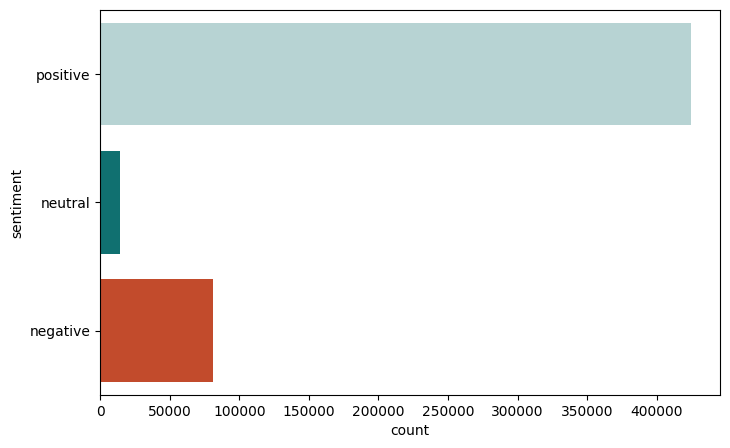

In [68]:
sns.countplot(y='sentiment', 
             data=coursera_r_orig, 
             palette=['#b2d8d8',"#008080", '#db3d13']
           )
plt.savefig('sentiment.png') 
plt.gcf().set_size_inches(8, 5)

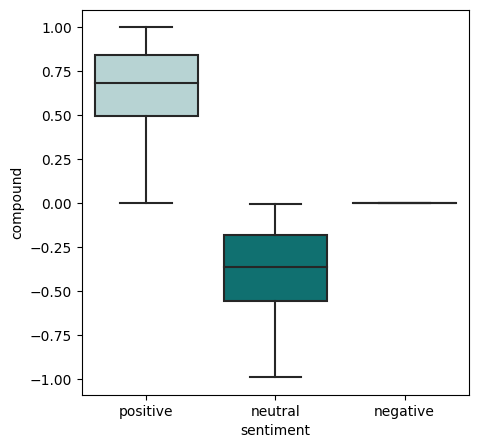

In [66]:
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=coursera_r_orig)
plt.savefig('compound.png')
plt.gcf().set_size_inches(5, 5)

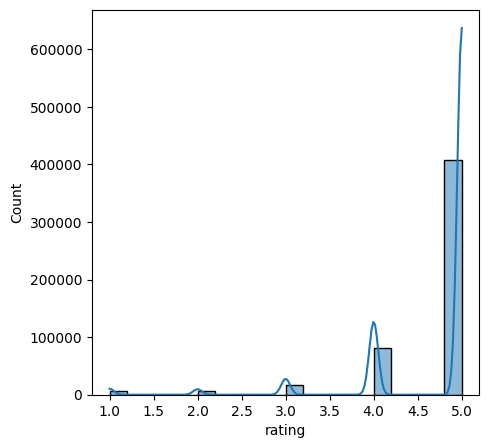

In [65]:
sns.histplot(data=coursera_r_orig, x="rating", kde=True)
plt.savefig('rating.png')
plt.gcf().set_size_inches(5, 5)

In [44]:
coursera_courses = pd.read_csv('Coursera_courses.csv')
coursera_courses.head(3)

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being


In [45]:
coursera_merged = pd.merge(coursera_r_orig,
                 coursera_courses[['course_id', 'name', 'institution']],
                 on='course_id')


In [46]:
coursera_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519947 entries, 0 to 519946
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviews               519947 non-null  object        
 1   reviewers             519947 non-null  object        
 2   date_reviews          519947 non-null  datetime64[ns]
 3   rating                519947 non-null  int64         
 4   course_id             519947 non-null  object        
 5   year                  519947 non-null  int64         
 6   reviews_token         519947 non-null  object        
 7   reviews_string        519947 non-null  object        
 8   reviews_string_fdist  519947 non-null  object        
 9   reviews_string_lem    519947 non-null  object        
 10  is_equal              519947 non-null  bool          
 11  neg                   519947 non-null  float64       
 12  neu                   519947 non-null  float64       
 13 

Se quitan columnas que no voy a necesitar

In [47]:
coursera_merged.drop(['reviews_token', 'reviews_string', 'reviews_string_fdist',
       'reviews_string_lem', 'is_equal', 'neg', 'neu', 'pos'], axis = 1, inplace= True)

Se plotean los ratings por año en los cursos cuyos id tienen mayor relevancia 

In [49]:
course_python = coursera_merged[coursera_merged['course_id'].str.contains('py')]


In [50]:
course_machine_learning =  coursera_merged[coursera_merged['course_id'].str.contains('machine-learning')]


In [51]:
course_neural_networks_deep_learning = coursera_merged[coursera_merged['course_id'].str.contains('deep-learning')]


In [52]:
course_technical_support_fundamentals = coursera_merged[coursera_merged['course_id'].str.contains('technical-support')]


In [53]:
course_learning_how_to_learn = coursera_merged[coursera_merged['course_id'].str.contains('how-to-learn')]


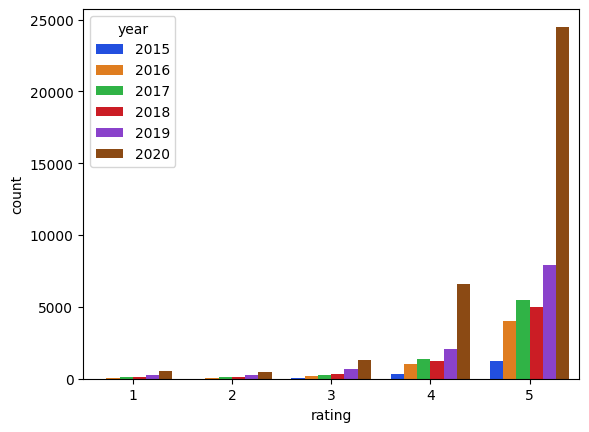

In [54]:
sns.countplot(x=course_python.rating,hue = course_python.year, palette='bright')
plt.show()

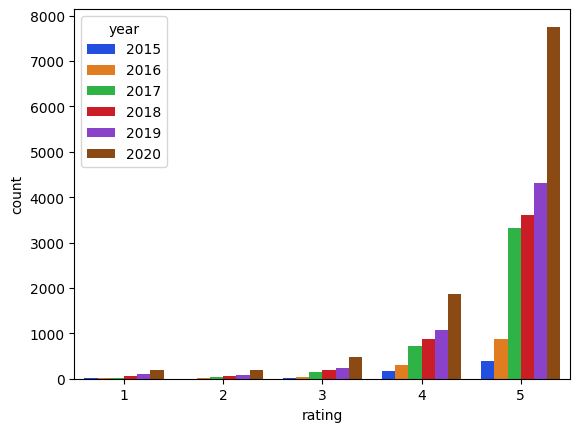

In [55]:
sns.countplot(x=course_machine_learning.rating,hue = course_machine_learning.year, palette='bright')
plt.show()

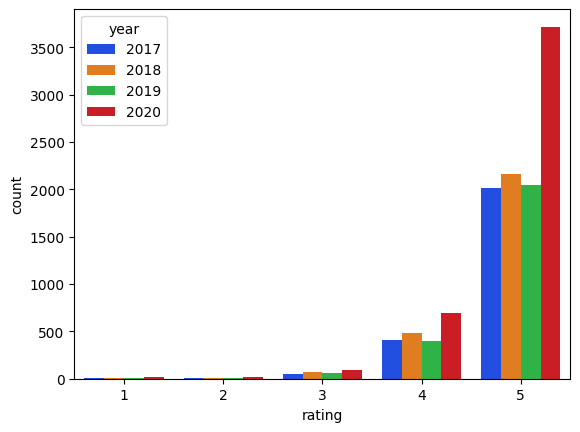

In [56]:
sns.countplot(x=course_neural_networks_deep_learning.rating,hue = course_neural_networks_deep_learning.year, palette='bright')
plt.show()

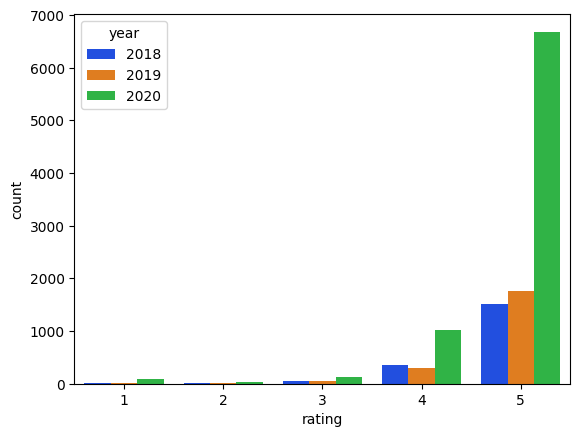

In [57]:
sns.countplot(x=course_technical_support_fundamentals.rating,hue = course_technical_support_fundamentals.year, palette='bright')
plt.show()

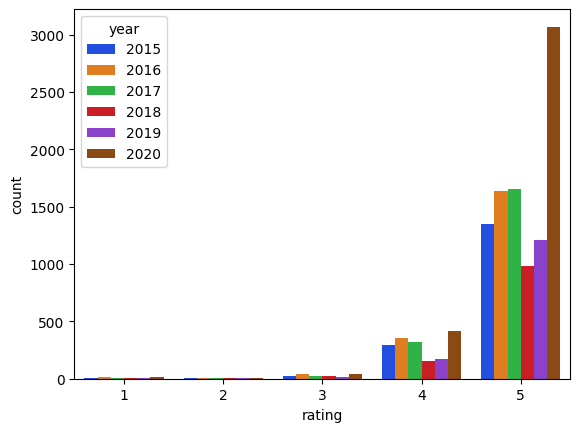

In [58]:
sns.countplot(x=course_learning_how_to_learn.rating,hue = course_learning_how_to_learn.year, palette='bright')
plt.show()

In [60]:
coursera_merged = coursera_merged.to_csv('coursera_final.csv')